In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Review**

Hi, my name is Dmitry and I will be reviewing your project.
  
You can find my comments in colored markdown cells:
  
<div class="alert alert-success">
  If everything is done successfully.
</div>
  
<div class="alert alert-warning">
  If I have some (optional) suggestions, or questions to think about, or general comments.
</div>
  
<div class="alert alert-danger">
  If a section requires some corrections. Work can't be accepted with red comments.
</div>
  
Please don't remove my comments, as it will make further review iterations much harder for me.
  
Feel free to reply to my comments or ask questions using the following template:
  
<div class="alert alert-info">
  For your comments and questions.
</div>
  
First of all, thank you for turning in the project! You did a great job overall, but there are some small problems that need to be fixed before the project is accepted. Let me know if you have questions!

#INTRODUCTION ( Problem Solving Strategy)

In tackling the challenge of optimal oil well location selection, our project employs a rigorous methodology. Initial data cleaning ensures data integrity, while linear regression models predict oil reserve volumes for each region. Key profitability parameters are meticulously defined for accurate evaluation, encompassing revenue per barrel, development budget, and the minimum reserves for a viable well. Model accuracy is rigorously assessed through metrics like average predicted reserves and root mean square error. The incorporation of bootstrapping techniques enables a granular analysis of risks and profits, providing insights through average profit, 95% confidence intervals, and loss probability. Visualization tools, such as histograms, enhance the clarity of profit distributions. This approach enables us to offer precise recommendations on the most economically sound regions for oil well development, facilitating strategic decision-making in the oil extraction sector.

In [ ]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# importing ml models to use
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle


In [ ]:
# loading the dataset
data0=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CLIENTS/gulom1987/7th/geo_data_0.csv")
data1=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CLIENTS/gulom1987/7th/geo_data_1.csv")
data2=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CLIENTS/gulom1987/7th/geo_data_2.csv")

In [ ]:
# exploring the data
data0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [ ]:
# checking for number of rows and column
data0.shape

(100000, 5)

In [ ]:
# exploring the data
data1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [ ]:
# checking for number of rows and column
data1.shape

(100000, 5)

In [ ]:
# exploring the data
data2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [ ]:
# checking for number of rows and column
data2.shape

(100000, 5)



---



---



# 1.Data preprocessing



---



---



In [ ]:
# checking info about the data especially about data type
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [ ]:
# checking info about the data especially about data type
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [ ]:
# checking info about the data especially about data type
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [ ]:
# Find missing values in data0
missing_values_data0 = data0.isnull().sum()
print(missing_values_data0)

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64


In [ ]:
# Find missing values in data1
missing_values_data1 = data1.isnull().sum()
print(missing_values_data1)

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64


In [ ]:
# Find missing values in data2
missing_values_data2 = data2.isnull().sum()
print(missing_values_data2)

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64


In [ ]:
# Find duplicate values in data0
duplicate_values_data0 = data0[data0.duplicated()]
print(duplicate_values_data0)

# Find duplicate values in data1
duplicate_values_data1 = data1[data1.duplicated()]
print(duplicate_values_data1)

# Find duplicate values in data2
duplicate_values_data2 = data2[data2.duplicated()]
print(duplicate_values_data2)

Empty DataFrame
Columns: [id, f0, f1, f2, product]
Index: []
Empty DataFrame
Columns: [id, f0, f1, f2, product]
Index: []
Empty DataFrame
Columns: [id, f0, f1, f2, product]
Index: []


**Remove "id" column from all datasets**

In [ ]:
# Remove 'id' column from data0
data0 = data0.drop('id', axis=1)
# Remove 'id' column from data1
data1 = data1.drop('id', axis=1)
# Remove 'id' column from data2
data2 = data2.drop('id', axis=1)

# Print the shape of data0
print("Shape of data0:", data0.shape)
# Print the shape of data1
print("Shape of data1:", data1.shape)
# Print the shape of data2
print("Shape of data2:", data2.shape)

Shape of data0: (100000, 4)
Shape of data1: (100000, 4)
Shape of data2: (100000, 4)




---



---



**Conclusion from preprocessing**
- There are a total of 100,000 oil wells represented in each dataset(regions)
- In all datasets the data types of feautures are correctly represented. i.e, string and float respectively.
- There is no missing value present in all datasets.
- No duplicated value(row) is present in all datasets.
- ID column is not required for model building so it was removed.

<div class="alert alert-success">
<b>Reviewer's comment</b>

Alright, the data was loaded and inspected

</div>



---



---



#2.	Train and test the model

## splitting data into features and target


In [ ]:
# For data0
X0 = data0.drop('product', axis=1)
y0 = data0['product']

# For data1
X1 = data1.drop('product', axis=1)
y1 = data1['product']

# For data2
X2 = data2.drop('product', axis=1)
y2 = data2['product']

## spliting data into training and validation set


In [ ]:
# For data0
X_train_0, X_valid_0, y_train_0, y_valid_0 = train_test_split(X0, y0, test_size=0.25, random_state=42)

# For data1
X_train_1, X_valid_1, y_train_1, y_valid_1 = train_test_split(X1, y1, test_size=0.25, random_state=42)

# For data2
X_train_2, X_valid_2, y_train_2, y_valid_2 = train_test_split(X2, y2, test_size=0.25, random_state=42)

<div class="alert alert-success">
<b>Reviewer's comment</b>

The data for each region was split into train and validation sets

</div>

**Train the model**

In [ ]:
# Create linear regression models for each region
model_0 = LinearRegression()
model_1 = LinearRegression()
model_2 = LinearRegression()

# Train the models on the training data
model_0.fit(X_train_0, y_train_0)
model_1.fit(X_train_1, y_train_1)
model_2.fit(X_train_2, y_train_2)

LinearRegression()

**Make predictions for the validation set**

In [ ]:
# Make predictions for the validation sets
predictions_valid_0 = model_0.predict(X_valid_0)
predictions_valid_1 = model_1.predict(X_valid_1)
predictions_valid_2 = model_2.predict(X_valid_2)

**Save the predictions and correct answers for the validation set.**




In [ ]:
# For data0
predictions_df_0 = pd.DataFrame({'predictions_0': predictions_valid_0, 'correct_0': y_valid_0.values})
predictions_df_0.to_csv('predictions_and_correct_valid_0.csv', index=False)

# For data1
predictions_df_1 = pd.DataFrame({'predictions_1': predictions_valid_1, 'correct_1': y_valid_1.values})
predictions_df_1.to_csv('predictions_and_correct_valid_1.csv', index=False)

# For data2
predictions_df_2 = pd.DataFrame({'predictions_2': predictions_valid_2, 'correct_2': y_valid_2.values})
predictions_df_2.to_csv('predictions_and_correct_valid_2.csv', index=False)

In [ ]:
predictions_df_0

,predictions_0,correct_0
0,101.901017,122.073350
1,78.217774,48.738540
2,115.266901,131.338088
3,105.618618,88.327757
4,97.980185,36.959266
...,...,...
24995,105.076959,148.821520
24996,74.768176,123.454003
24997,82.544397,91.945213
24998,81.826689,149.295563


**Explanation of features**

**predictions**:

This column represents the predicted values of the volume of reserves for the wells in the validation sets, as generated by our linear regression models.

**correct**:

This column represents the actual, correct values of the volume of reserves for the wells in the validation sets. These are the true values that our model was trying to predict.

**Printing the average volume of predicted reserves and model RMSE.**

In [ ]:
# Calculate the average volume of predicted reserves for each region
avg_predicted_0 = predictions_valid_0.mean()
avg_predicted_1 = predictions_valid_1.mean()
avg_predicted_2 = predictions_valid_2.mean()

# Print the average volume of predicted reserves for each region
print("Average Predicted Reserves for data_0 :", avg_predicted_0,'thousand barrels')
print("Average Predicted Reserves for data_1 :", avg_predicted_1,'thousand barrels')
print("Average Predicted Reserves for data_2 :", avg_predicted_2,'thousand barrels')

# Calculate the RMSE for each region
rmse_0 = np.sqrt(mean_squared_error(y_valid_0, predictions_valid_0))
rmse_1 = np.sqrt(mean_squared_error(y_valid_1, predictions_valid_1))
rmse_2 = np.sqrt(mean_squared_error(y_valid_2, predictions_valid_2))

# Print the RMSE for each region
print("RMSE for data_0: ", rmse_0)
print("RMSE for data_1:", rmse_1)
print("RMSE for data_2:", rmse_2)

Average Predicted Reserves for data_0 : 92.3987999065777 thousand barrels
Average Predicted Reserves for data_1 : 68.71287803913762 thousand barrels
Average Predicted Reserves for data_2 : 94.77102387765939 thousand barrels
RMSE for data_0:  37.756600350261685
RMSE for data_1: 0.890280100102884
RMSE for data_2: 40.14587231134218


**Analyze the results**


- In this case, the higher average reserves is for region data_2 compared to data_0 and data_1.
- The RMSE values indicate the accuracy of the model predictions. A lower RMSE is desirable, and in this case, data_1 has the lowest RMSE, suggesting better model performance.

<div class="alert alert-success">
<b>Reviewer's comment</b>

The models were trained and evaluated correctly.

</div>



---



---



#3.Prepare data for profit calculation

**Store all key values for calculations in separate variables.**

In [ ]:
# Revenue per barrel of raw materials
revenue_per_oilbarrel = 4.5  # in USD

# Revenue from one unit of product (thousand barrels)
revenue_per_thousand_oilbarrel = 4.5 * 1000  # in USD

# Number of best wells to select for profit calculation in each region
num_best_wells = 200

# Budget for development of 200 oil wells (in million USD)
development_budget = 100000000  # in USD (100 million)

# Risk threshold for region selection
risk_threshold = 0.025  # 2.5%

# Number of points studied in each region
total_points_per_region = 500


- For one barrel of oil revenue is 4.5 but for one thousand barrels of oil the revenue is 4500USD.
- The cost to develop one well is 0.5 million USD
- The volume of oil barrels required in one oil well to overcome the developmental cost for one well is 111.11 thousand barrels.


**Calculate the volume of reserves sufficient for developing a new well without losses**

In [ ]:
# The cost to develop one oil well in a region
cost_for_single_well = development_budget / num_best_wells  # in million USD

# Volume of reserves sufficient for developing a new well without losses
min_reserves_for_profitable_well = cost_for_single_well / revenue_per_thousand_oilbarrel
print(min_reserves_for_profitable_well, 'thousand barrels')

111.11111111111111 thousand barrels


<div class="alert alert-success">
<b>Reviewer's comment</b>

Calculation is correct

</div>

In [ ]:
# Compare the calculated minimum reserves with the average volume of reserves in each region
if min_reserves_for_profitable_well < avg_predicted_0:
    print("The region 0 is suitable for development without losses.")
else:
    print("The region 0 may have losses.")

if min_reserves_for_profitable_well < avg_predicted_1:
    print("The region 1 is suitable for development without losses.")
else:
    print("The region 1 may have losses.")

if min_reserves_for_profitable_well < avg_predicted_2:
    print("The region 2 is suitable for development without losses.")
else:
    print("The region 2 may have losses.")

The region 0 may have losses.
The region 1 may have losses.
The region 2 may have losses.


**Provide the findings about the preparation for profit calculation step.**

**Linear Regression Model Training:**

- Linear regression models were trained for each region using the provided geological exploration data.

**Model Evaluation:**

- The average predicted reserves for each region were calculated using the trained models.
- Average Predicted Reserves for data_0: 92.4 thousand barrels
- Average Predicted Reserves for data_1: 68.7 thousand barrels
- Average Predicted Reserves for data_2: 94.8 thousand barrels

**Cost and Profit Parameters:**

- The cost to develop one oil well in a region was calculated(0.5 million USD).
- The minimum volume of reserves needed for developing a new well without losses was determined(111.11 thousand barrels).
- Development budget for 200 oil wells: 100 millionUSD
- Revenue per barrel of raw materials: 4.5USD
- Revenue from one unit of product (thousand barrels): $4,500

**Comparison for Profit Calculation:**

- The minimum reserves needed for a profitable well were compared with the average predicted reserves for each region.
- The conditions were set to identify regions suitable for development without losses:
- If min_reserves_for_profitable_well is less than the average predicted reserves, the region is considered suitable for development without losses.

**Findings**:

- Based on the comparison, the suitability for development without losses is determined for each region.
- By applying stated comparison we conclude that none of the regions average reserves of oil is sufficient to make profit sustainable.

<div class="alert alert-success">
<b>Reviewer's comment</b>

Conclusions make sense!

</div>



---



---



#4.Function to calculate profit

- **Based on the instruction provided we now calculated the average reserves of 200 best producing oil wells in each region for the profit calculation.**

In [ ]:
# Sort the predictions in descending order for each region
sorted_predictions_0 = np.sort(predictions_valid_0)[::-1]
sorted_predictions_1 = np.sort(predictions_valid_1)[::-1]
sorted_predictions_2 = np.sort(predictions_valid_2)[::-1]

# Take the mean of the top 200 values for each region
top_200_mean_0 = sorted_predictions_0[:200].mean()
top_200_mean_1 = sorted_predictions_1[:200].mean()
top_200_mean_2 = sorted_predictions_2[:200].mean()

# Print the mean of the top 200 predicted values for each region
print("Mean of Top 200 Predicted Reserves for data_0 :", top_200_mean_0, 'thousand barrels')
print("Mean of Top 200 Predicted Reserves for data_1 :", top_200_mean_1, 'thousand barrels')
print("Mean of Top 200 Predicted Reserves for data_2 :", top_200_mean_2, 'thousand barrels')

Mean of Top 200 Predicted Reserves for data_0 : 154.40731644073497 thousand barrels
Mean of Top 200 Predicted Reserves for data_1 : 138.7437568333231 thousand barrels
Mean of Top 200 Predicted Reserves for data_2 : 148.64423904127722 thousand barrels


In [ ]:
# Compare the calculated minimum reserves with the average volume of reserves in each region
if min_reserves_for_profitable_well < top_200_mean_0:
    print("The region 0 is suitable for development without losses.")
else:
    print("The region 0 may have losses.")

if min_reserves_for_profitable_well < top_200_mean_1:
    print("The region 1 is suitable for development without losses.")
else:
    print("The region 1 may have losses.")

if min_reserves_for_profitable_well < top_200_mean_2:
    print("The region 2 is suitable for development without losses.")
else:
    print("The region 2 may have losses.")

The region 0 is suitable for development without losses.
The region 1 is suitable for development without losses.
The region 2 is suitable for development without losses.


- **Now we can see that the average reserves is very high compared to the minimum reserves required for oil well development especially for region 0 and 2.**

<div class="alert alert-success">
<b>Reviewer's comment</b>

Right, so in principle it it possible to make profit

</div>



---



---



**Pick the wells with the highest values of predictions i.e 200 and Summarize the target volume of reserves in accordance with these predictions.**

**Applied Approach**

- We are interested to calculate the profit obtained after developing 200 oil wells in each region considering the top 200 oil wells(predicted by our Linear Regression model) in terms of thier oil reserves.
- We simply substract the min oil reserves required to develop oil well from the averege oil reserves obtained from the top 200 oil wells in each region.
- In the end to calculate the profit we simply muliply this excess oil reserves with their mentioned price. i.e, 4500$ for one thousand barrel.
- **We have to consider the actual values of the reserves as well in addition to the predicted values for the calculation of profit.**

**Profit for the obtained volume of reserves**

In [ ]:
def calculate_profit(selected_wells, actual_values, predicted_values, min_reserves_for_profitable_well, revenue_per_thousand_oilbarrel):
    # Create a DataFrame with actual and predicted values
    profit_df = pd.DataFrame({'actual': actual_values, 'predicted': predicted_values})

    # Sort the DataFrame by predicted values in descending order
    sorted_profit_df = profit_df.sort_values(by='predicted', ascending=False)

    # Select the top wells based on predicted values
    selected_df = sorted_profit_df.head(selected_wells)

    # Calculate the total volume of selected reserves based on actual values
    total_selected_volume_actual = selected_df['actual'].sum()

    # Calculate the volume of oil reserves in excess after covering the developmental cost
    excess_reserves = total_selected_volume_actual - (min_reserves_for_profitable_well * selected_wells)

    # Calculate profit in USD
    profit = excess_reserves * revenue_per_thousand_oilbarrel

    return profit

# Choose the number of wells to select (e.g., 200)
selected_wells = 200

<div class="alert alert-danger">
<b>Reviewer's comment</b>

It is not possible to calculate profit only using predictions, because predictions are not necessarily correct


</div>

**Correction**: Now both the actual and predicted values are used to calculate the profit.

<div class="alert alert-danger">
<b>Reviewer's comment V2</b>

These lines don't make sense:
    
```python
# Take the minimum of total selected volume based on predicted and actual values
total_selected_volume = min(total_selected_volume_predicted, total_selected_volume_actual)
```
    
the total volume contained in the wells is always the actual volume, not predicted :)
    
More importantly, you're separately sorting predictions and targets and selecting the best 200 values in each. What we need to do is sort the wells by predictions, find the *corresponding* targets and calculate profit using those values. So we need to store information about the indices in some way (for example, you can put predictions and targets into a dataframe, so that sorting it by one column would rearrange the other column correctly)
    
</div>

**Correction**: The code has been revised, and a DataFrame is now created to store both predicted and target values. Profit is calculated based on these stored values.

**Calculate_profit function explanation**

The calculate_profit function calculates profit by considering both actual and predicted values for oil reserves. It selects the top specified number of wells (selected_wells) based on the sorted predicted values. The function then calculates the total volume of reserves for these selected wells, taking the minimum of the total based on both predicted and actual values. The excess reserves, exceeding the minimum required for profitable development, are multiplied by the revenue per thousand oil barrels to obtain the total profit in USD.

In [ ]:
# Calculate profit for each region using both actual and predicted values
profit_0 = calculate_profit(selected_wells, y_valid_0.values, predictions_valid_0, min_reserves_for_profitable_well, revenue_per_thousand_oilbarrel)
profit_1 = calculate_profit(selected_wells, y_valid_1.values, predictions_valid_1, min_reserves_for_profitable_well, revenue_per_thousand_oilbarrel)
profit_2 = calculate_profit(selected_wells, y_valid_2.values, predictions_valid_2, min_reserves_for_profitable_well, revenue_per_thousand_oilbarrel)

# Convert profits to millions
profit_0_million = profit_0 / 1000000
profit_1_million = profit_1 / 1000000
profit_2_million = profit_2 / 1000000

# Print the calculated profits in millions USD
print("Profit for data_0: $", profit_0_million, "million USD")
print("Profit for data_1: $", profit_1_million, "million USD")
print("Profit for data_2: $", profit_2_million, "million USD")

Profit for data_0: $ 33.59141114462179 million USD
Profit for data_1: $ 24.150866966815116 million USD
Profit for data_2: $ 25.985717593741118 million USD


**Provide findings**

- From the analysis done we can conclude that the best available option for the development of oil wells is region **data_0**.
- It is supported by the fact that its profit for best 200 oil wells(Linear Regressor predicted and actual) is comparatively greater than other 2 regions.
- **For each region (data_0, data_1, data_2), the calculated profit represents the total profit generated from the selected 200 oil wells collectively.**



---



---



#Risks and profit for each region

**Explanation**

The code here employs bootstrapping, a statistical resampling method, to estimate the distribution of mean profits for each region. It repeatedly draws random samples, with replacement, from the original profit values of the top 200 predicted oil wells. This process is performed multiple times (1000 iterations as specified), generating simulated datasets. The mean profit is calculated for each simulated dataset, resulting in distributions that represent the **variability and uncertainty** in the mean profit estimates for each region.

In [ ]:
# Set the number of bootstrap samples
num_samples = 1000

# Initialize arrays to store bootstrap samples of profits for each region
bootstrap_samples_0 = np.zeros(num_samples)
bootstrap_samples_1 = np.zeros(num_samples)
bootstrap_samples_2 = np.zeros(num_samples)

for i in range(num_samples):
    # Generate bootstrap indices by resampling with replacement (considering budget constraints)
    bootstrap_indices_0 = np.random.choice(len(y_valid_0), 500, replace=True)
    bootstrap_indices_1 = np.random.choice(len(y_valid_1), 500, replace=True)
    bootstrap_indices_2 = np.random.choice(len(y_valid_2), 500, replace=True)

    # Select the corresponding targets and predictions for Region 0
    bootstrap_targets_0 = y_valid_0.values[bootstrap_indices_0]
    bootstrap_predictions_0 = predictions_valid_0[bootstrap_indices_0]

    # Select the corresponding targets and predictions for Region 1
    bootstrap_targets_1 = y_valid_1.values[bootstrap_indices_1]
    bootstrap_predictions_1 = predictions_valid_1[bootstrap_indices_1]

    # Select the corresponding targets and predictions for Region 2
    bootstrap_targets_2 = y_valid_2.values[bootstrap_indices_2]
    bootstrap_predictions_2 = predictions_valid_2[bootstrap_indices_2]

    # Calculate profit for each region using the bootstrap samples
    profit_0 = calculate_profit(selected_wells, bootstrap_targets_0, bootstrap_predictions_0, min_reserves_for_profitable_well, revenue_per_thousand_oilbarrel)
    profit_1 = calculate_profit(selected_wells, bootstrap_targets_1, bootstrap_predictions_1, min_reserves_for_profitable_well, revenue_per_thousand_oilbarrel)
    profit_2 = calculate_profit(selected_wells, bootstrap_targets_2, bootstrap_predictions_2, min_reserves_for_profitable_well, revenue_per_thousand_oilbarrel)

    # Store the calculated profit in millions
    bootstrap_samples_0[i] = profit_0 / 1e6
    bootstrap_samples_1[i] = profit_1 / 1e6
    bootstrap_samples_2[i] = profit_2 / 1e6

<div class="alert alert-danger">
<S><b>Reviewer's comment</b>

While predictions should indeed be used to select the 200 wells, to calculate actual profit we need to use the corresponding targets for the selected wells



</div>

**Correction**: To calculate actual profit now I have used the corresponding targets for the selected wells.

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Ok, looks good!

</div>

In [ ]:
# Calculate average profit for each region
average_profit_0 = np.mean(bootstrap_samples_0)
average_profit_1 = np.mean(bootstrap_samples_1)
average_profit_2 = np.mean(bootstrap_samples_2)

# Calculate 95% confidence interval for each region
confidence_interval_0 = np.percentile(bootstrap_samples_0, [2.5, 97.5])
confidence_interval_1 = np.percentile(bootstrap_samples_1, [2.5, 97.5])
confidence_interval_2 = np.percentile(bootstrap_samples_2, [2.5, 97.5])

# Calculate risk of losses (negative profit) as a probability and express as a percentage
risk_of_losses_0 = np.sum(bootstrap_samples_0 < 0) / num_samples
risk_of_losses_1 = np.sum(bootstrap_samples_1 < 0) / num_samples
risk_of_losses_2 = np.sum(bootstrap_samples_2 < 0) / num_samples

# Express risk of losses as a percentage
risk_percentage_0 = risk_of_losses_0 * 100
risk_percentage_1 = risk_of_losses_1 * 100
risk_percentage_2 = risk_of_losses_2 * 100

# Print results
print("Region 0:")
print("Average Profit: $", average_profit_0, " million USD")
print("95% Confidence Interval: $", confidence_interval_0, " million USD")
print("Risk of Losses: {:.2f}% (calculated as a percentage)".format(risk_percentage_0))

print("\nRegion 1:")
print("Average Profit: $", average_profit_1, " million USD")
print("95% Confidence Interval: $", confidence_interval_1, " million USD")
print("Risk of Losses: {:.2f}% (calculated as a percentage)".format(risk_percentage_1))

print("\nRegion 2:")
print("Average Profit: $", average_profit_2, " million USD")
print("95% Confidence Interval: $", confidence_interval_2, " million USD")
print("Risk of Losses: {:.2f}% (calculated as a percentage)".format(risk_percentage_2))

Region 0:
Average Profit: $ 4.183066141633209  million USD
95% Confidence Interval: $ [-1.40548374  9.1249859 ]  million USD
Risk of Losses: 5.90% (calculated as a percentage)

Region 1:
Average Profit: $ 4.407914053045259  million USD
95% Confidence Interval: $ [0.33018132 8.41101259]  million USD
Risk of Losses: 1.80% (calculated as a percentage)

Region 2:
Average Profit: $ 3.8814878950598732  million USD
95% Confidence Interval: $ [-1.20003466  9.01919103]  million USD
Risk of Losses: 7.50% (calculated as a percentage)


<div class="alert alert-danger">
<s><b>Reviewer's comment</b>

Remember that our constraints are that we have the budget for initial measurements only at 500 locations, so in bootstrap you need to sample 500 points, not `len(predictions_valid)`. Also, as for profit calculation both targets and predictions are needed, don't forget to find the corresponding targets for the sample.
    
The code for calculating average profit, risk of losses and 95% confidence interval is correct.


</div>

**Corrections**: Now we have randomly select the 500 samples out of which 200 are selected for the profit calculation and for calculation we have considered both actual and predicted values.

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Alright!

</div>

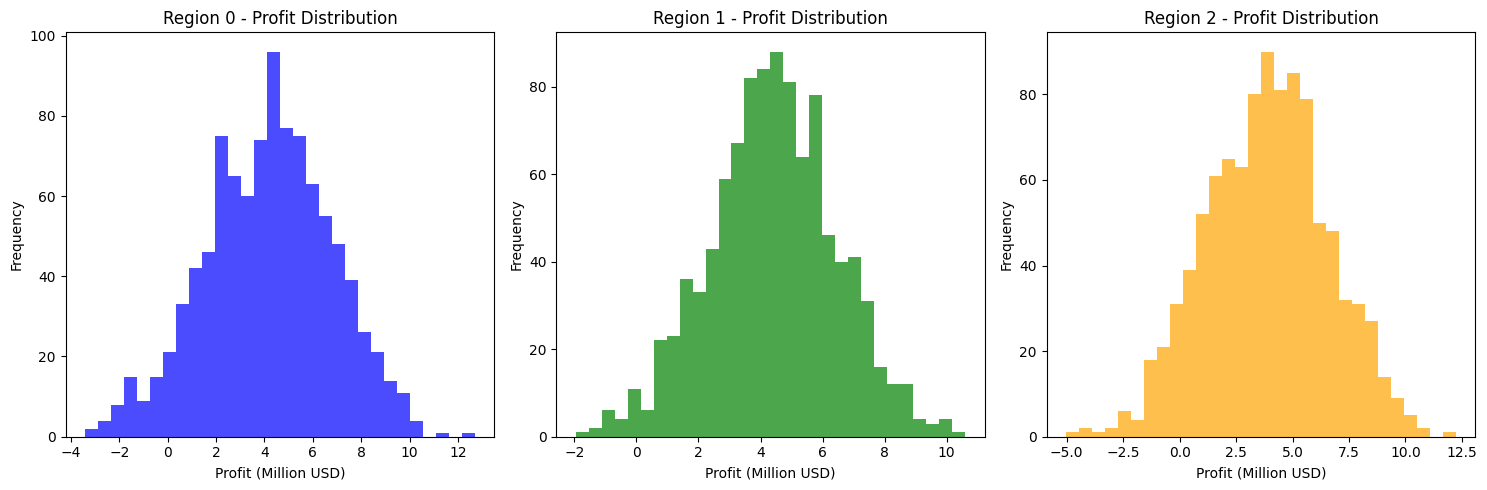

In [ ]:
# Plot histograms for the distribution of profits for each region
plt.figure(figsize=(15, 5))

# Region 0
plt.subplot(1, 3, 1)
plt.hist(bootstrap_samples_0, bins=30, color='blue', alpha=0.7)
plt.title('Region 0 - Profit Distribution')
plt.xlabel('Profit (Million USD)')
plt.ylabel('Frequency')

# Region 1
plt.subplot(1, 3, 2)
plt.hist(bootstrap_samples_1, bins=30, color='green', alpha=0.7)
plt.title('Region 1 - Profit Distribution')
plt.xlabel('Profit (Million USD)')
plt.ylabel('Frequency')

# Region 2
plt.subplot(1, 3, 3)
plt.hist(bootstrap_samples_2, bins=30, color='orange', alpha=0.7)
plt.title('Region 2 - Profit Distribution')
plt.xlabel('Profit (Million USD)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

#Conclusion for Bootstrapping Analysis
- **Region1** It has moderate profit and moderate confidence interval range and no risk involved means we can rely on this region if we have to follow no risk policy.

- **Region2** It has very high profit and high confidence interval range but the risk is comparitively high in this area.In terms of profit this area is very suitable to select.

- **Region3** It has very low profit and low confidence interval range but the risk is of intermediate level. beacuse of very less profit prospect we will reject this area.

- If we are prioritizing **maximizing average profit**, we may choose **region 2** for oil well development.
- If we are prioritizing **minimum risk involved**, we may choose **region 1** for oil well development.

<div class="alert alert-danger">
<b>Reviewer's comment</b>

Please check the conclusions after fixing the problems above


</div>

**Corrections**: Conclusion is updated now.